https://finance.yahoo.com/calendar/earnings/?day=2023-12-29


/Users/saumikdana/Machine_Learning_Trading/data/scrape_url.py:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Options data for LFCR:
Average IV for Calls: 1.285076900065104
Average IV for Puts: 0.7618608220563616
Total Call Volume: 124.0
Total Call open interest: 2279
Total Call engagement: 2403.0
Total Put Volume: 73.0
Total Put open interest: 910
Total Put engagement: 983.0
Number of ITM Call Options: 6
Number of ITM Put Options: 11
Data fetched for LFCR, entries: 132


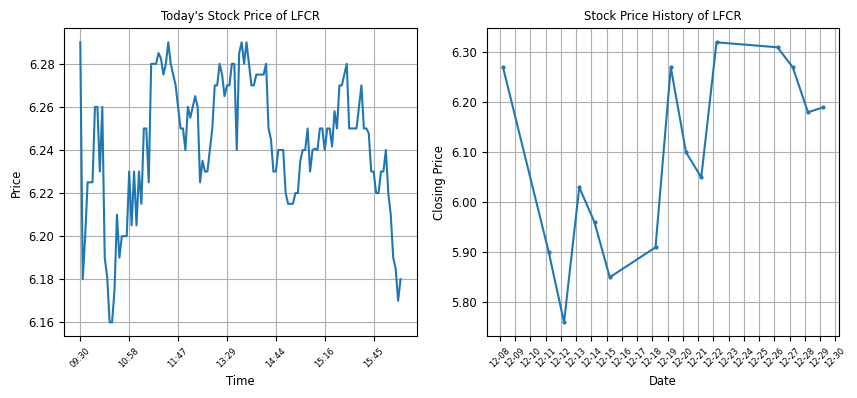

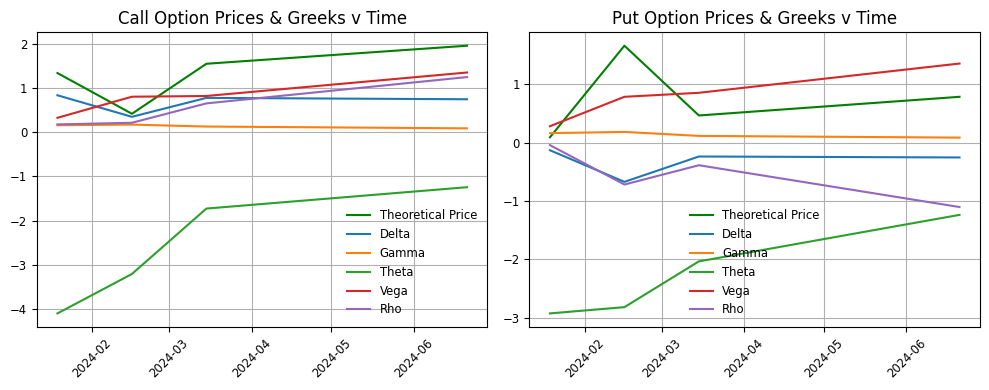

Options data for MDVL:
Average IV for Calls: 1.0000000000000003e-05
Average IV for Puts: nan
Total Call Volume: 2
Total Call open interest: 0
Total Call engagement: 2
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 1
Number of ITM Put Options: 0
Data fetched for MDVL, entries: 13


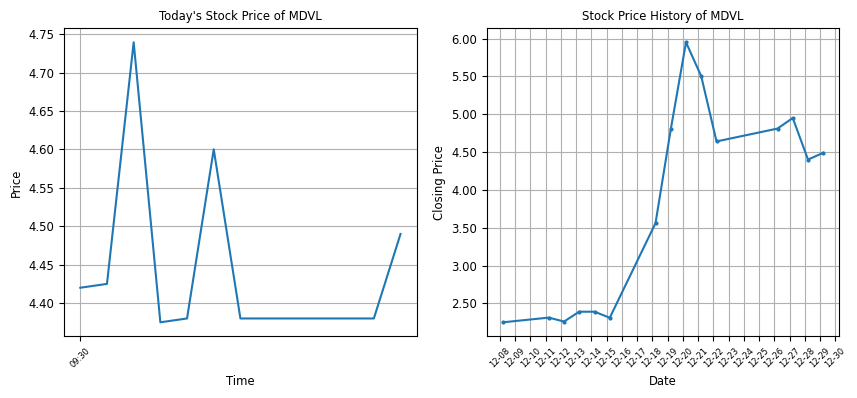

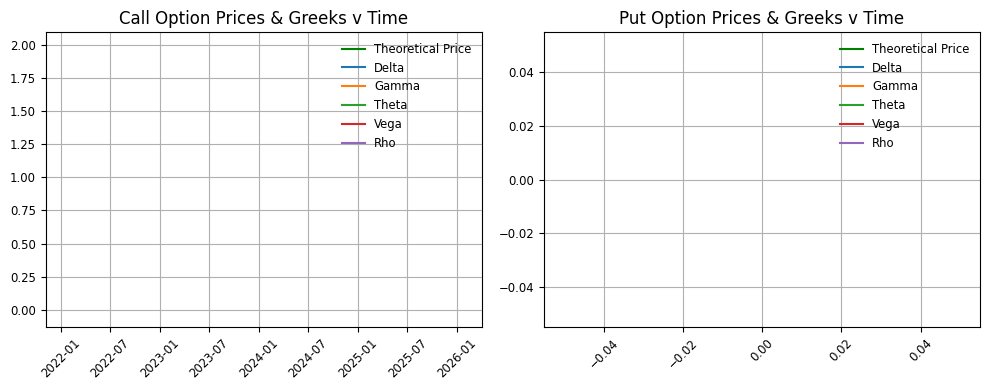

Options data for LILM:
Average IV for Calls: 2.017748417524858
Average IV for Puts: 2.3013583105764677
Total Call Volume: 500.0
Total Call open interest: 43908
Total Call engagement: 44408.0
Total Put Volume: 568.0
Total Put open interest: 4946
Total Put engagement: 5514.0
Number of ITM Call Options: 5
Number of ITM Put Options: 16
Data fetched for LILM, entries: 359


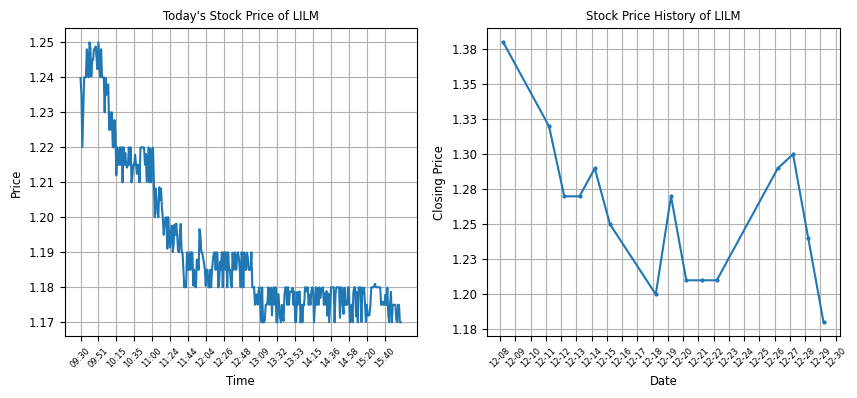

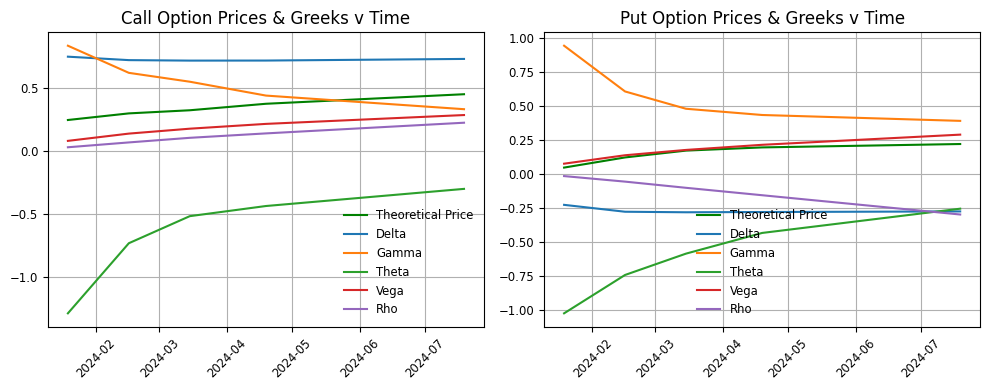

Options data for CTXR:
Average IV for Calls: 2.944012657877604
Average IV for Puts: nan
Total Call Volume: 131.0
Total Call open interest: 39639
Total Call engagement: 39770.0
Total Put Volume: 55.0
Total Put open interest: 725.0
Total Put engagement: 780.0
Number of ITM Call Options: 0
Number of ITM Put Options: 5
Data fetched for CTXR, entries: 281


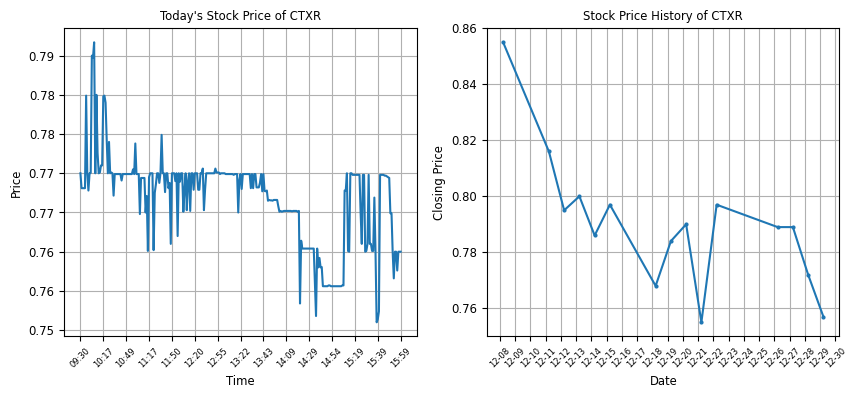

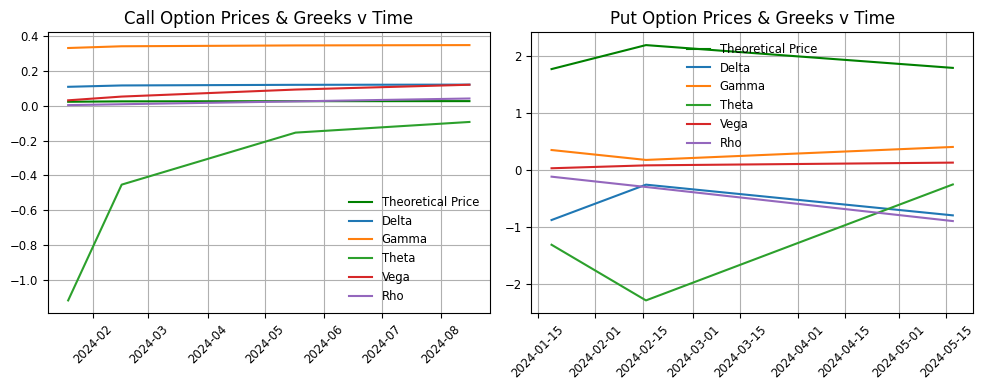

Options data for UXIN:
Average IV for Calls: 2.459080589192708
Average IV for Puts: 2.8611146983506948
Total Call Volume: 74.0
Total Call open interest: 2041
Total Call engagement: 2115.0
Total Put Volume: 478.0
Total Put open interest: 172
Total Put engagement: 650.0
Number of ITM Call Options: 0
Number of ITM Put Options: 7
Data fetched for UXIN, entries: 177


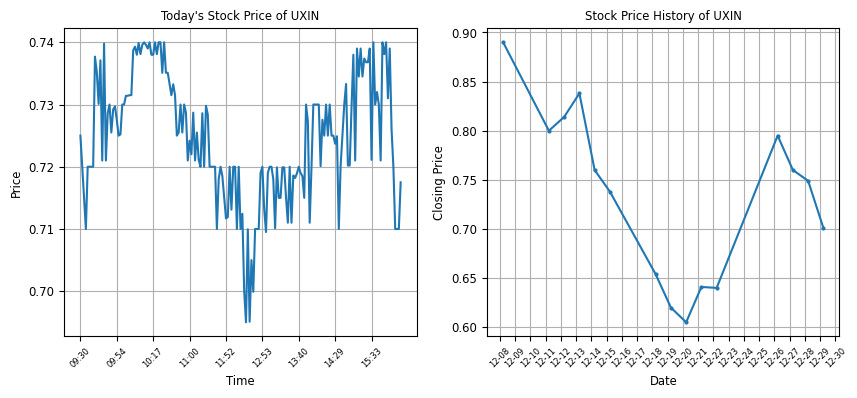

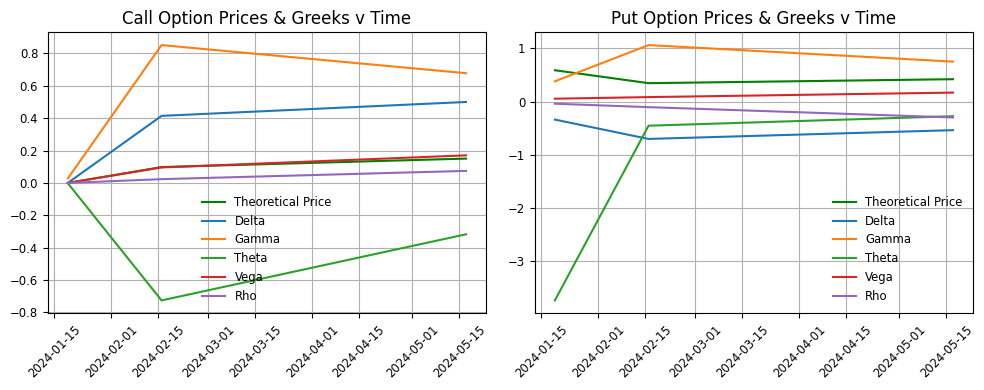

In [1]:
from datetime import datetime, timedelta
from analyze_stock import *  
from scrape_url import *
from analyze_options import *

# Call the function and store the result
day = '2023-12-29'
date = datetime.strptime(day, '%Y-%m-%d')

# Set the time frame
end_date = date + timedelta(days=7)
start_date = date - timedelta(days=21)

# First page
url = 'https://finance.yahoo.com/calendar/earnings/?day=' + day
print(url)

ticker_data_list = process_earnings_table(extract_table(url))
    
# Second page
url += '&offset=100&size=100'

ticker_data_list = process_earnings_table(extract_table(url), ticker_data_list)

# Pandas Dataframe
ticker_data_sorted = convert_to_dataframe(ticker_data_list)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)
    
    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Get All Analysis
    get_info(ticker, options_metrics, start_date, end_date)

    # Black Scholes
    analyze_and_plot_greeks(ticker)
    
    # Filtered tickers
    filtered_tickers.append(ticker)
    
del filtered_tickers, ticker_data_list, ticker_data_sorted